In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Install Libraries
# ! pip install pandas
# ! pip install statsmodels

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Importing dataset from the Google Drive
train_df = pd.read_csv("/content/drive/MyDrive/Time Series /Weather Forecasting Dataset from Kaggle/DailyDelhiClimateTrain.csv")

In [ ]:
print(train_df.shape)
print(train_df.columns)

(1462, 5)
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


In [ ]:
# Checking wether the dataset contains any null value
print(train_df.isna().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
print(train_df.date) # Checking the date format

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1457    2016-12-28
1458    2016-12-29
1459    2016-12-30
1460    2016-12-31
1461    2017-01-01
Name: date, Length: 1462, dtype: object


In [ ]:
# Defined a function to convert the daily records to monthly records and converting the a multivariate time series to univariate time series dataset
def monthly_avg_temperature(data):
  monthly_temp_df = data.copy()
  monthly_temp_df.date = monthly_temp_df.date.apply(lambda x: str(x)[:-3]) # Extracting the year and month from the date feature
  monthly_temp = monthly_temp_df.groupby("date").mean().reset_index() # Generating a new dataset with monthly mean temperature
  monthly_temp.date = pd.to_datetime(monthly_temp.date) # Converting again back to datetime format
  # monthly_temp = monthly_temp.drop(['humidity', 'wind_speed', 'meanpressure'], axis='columns') # Since the objective is to forecast the monthly mean temperature therefore removing other un-imporatnt features.

  return monthly_temp

In [ ]:
df = monthly_avg_temperature(train_df[:-1])
df = df[1:]

In [ ]:
# Setting an index as Date
df = df.set_index('date')
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-02-01,16.867560,71.938563,7.474090,1015.946003
2013-03-01,22.814209,57.417243,8.757270,1011.733909
2013-04-01,28.895119,34.612103,8.046385,1006.292341
2013-05-01,33.776767,28.938249,8.943452,999.924194
2013-06-01,32.480873,58.758135,9.593929,997.408849
2013-07-01,30.663594,74.873387,7.358698,997.380300
2013-08-01,29.547773,76.757104,7.384347,1000.439977
2013-09-01,29.840595,64.552738,7.593425,1003.949167
2013-10-01,26.129186,70.255607,2.836110,1009.848848


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fe42cab50>,
      dtype=object)

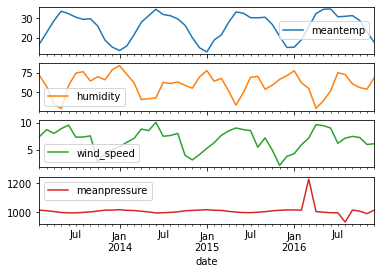

In [ ]:
# Plotting the monthly dataset to check wether it contains seasonality or it is a non-seasonal data along with the trend
df.plot(subplots=True)

## Checking the Stationarity on the timeseries data

In [ ]:
# Johansen Cointegration Test
def johansen_test(data):
  '''
  The eigenvectors give us the equation of the mean-reverting linear combination of the time series.
  The eigenvector corresponding to the highest eigenvalue represents the portfolio which has the greatest mean-reverting property.
  The null hypothesis was that the time series are not cointegrated,
  hence when we reject the null hypothesis and accept the alternate hypothesis,
  we suggest that the series are cointegrated.
  '''
  result = coint_johansen(data,-1,1)
  print(f" Crit-90%Crit-95%Crit-99%\n{result.cvt}")
  print(f"Trace Values: {result.lr1}\n")
  print(f" Crit-90%Crit-95%Crit-99%\n{result.cvm}")
  # print(f"Eigen Values: {result.eig}")
  print(f"Maximum Eigen Values: {result.lr2}")

In [ ]:
johansen_test(df)

 Crit-90%Crit-95%Crit-99%
[[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]
Trace Values: [9.21001813e+01 4.17948985e+01 1.53824803e+01 6.14592213e-03]

 Crit-90%Crit-95%Crit-99%
[[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
Maximum Eigen Values: [5.03052828e+01 2.64124182e+01 1.53763344e+01 6.14592213e-03]


(37, 4) (10, 4)


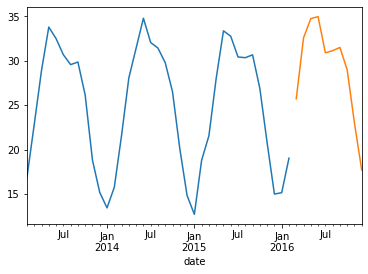

In [ ]:
#creating the train and validation set
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]
print(train.shape, valid.shape)
train.meantemp.plot()
valid.meantemp.plot()

In [ ]:
model = VAR(endog=train)
model_fit = model.fit()
print(model_fit.summary)

# # make prediction on validation
# prediction = model_fit.forecast(model_fit.y, steps=len(valid))

<bound method VARResults.summary of <statsmodels.tsa.vector_ar.var_model.VARResults object at 0x7f0fdb160610>>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# # converting predictions to dataframe
# cols = df.columns
# pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
# for j in range(0,len(cols)):
#     for i in range(0, len(prediction)):
#        pred.iloc[i][j] = prediction[i][j]

In [ ]:
# # check rmse
# for i in cols:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

In [ ]:
# # After the testing on validation set, lets fit the model on the complete dataset
# # make final predictions
# model = VAR(endog=df)
# model_fit = model.fit()
# yhat = model_fit.forecast(model_fit.y, steps=1)
# print(yhat)

In [ ]:
# # Install Libraries
# ! pip install pmdarima

In [ ]:
# # Importing Libraries
# import pmdarima as pm

In [ ]:
# SARIMA_Auto_Model = pm.auto_arima(y=train['meantemp'],X=train[['humidity', 'wind_speed', 'wind_speed', 'meanpressure']], m=12, seasonal=True, start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore', suppress_warnings=True, stepwise=True, trace=True)

# SARIMA_Auto_Model.plot_diagnostics(figsize=(26,7))
# plt.show()

In [ ]:
# # Forecast
# n_periods = 10
# forecast=SARIMA_Auto_Model.predict(n_periods=n_periods, X=valid[['humidity', 'wind_speed', 'wind_speed', 'meanpressure']], return_conf_int=True)
# forecast_df = pd.DataFrame(forecast[0],index = valid.index,columns=['Prediction'])
# predicted_df = pd.concat([valid['meantemp'],forecast_df],axis=1)
# plt.plot(train.meantemp)
# plt.plot(predicted_df)
# plt.legend(predicted_df.index)
# plt.show()

In [ ]:
# Install Libraries
%%capture
! pip install pycaret
! pip install jinja2==2.11.3
! pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

In [ ]:
# Importing Libraries
import keras
import jinja2
from pycaret.regression import *
from markupsafe import soft_unicode

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# initialize setup
s = setup(data = train, test_data = valid, target = 'meantemp', fold_strategy = 'timeseries', verbose = True, numeric_features = ['humidity', 'wind_speed', 'wind_speed', 'meanpressure'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,meantemp
2,Original Data,"(37, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(37, 3)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.3450,2.8326,1.6033,0.9441,0.0762,0.0645,0.0833
et,Extra Trees Regressor,1.3502,2.9871,1.6692,0.9426,0.0831,0.0692,0.2033
gbr,Gradient Boosting Regressor,1.4185,3.2453,1.7047,0.9396,0.0794,0.0678,0.0433
en,Elastic Net,1.5681,3.6295,1.9015,0.9264,0.0932,0.0789,0.9100
rf,Random Forest Regressor,1.5346,4.6495,1.9878,0.9146,0.0991,0.0811,0.2533
lasso,Lasso Regression,1.8013,4.8805,2.2005,0.9013,0.1078,0.0918,0.9133
omp,Orthogonal Matching Pursuit,1.7811,4.9014,2.2110,0.9013,0.0984,0.0832,0.0233
dt,Decision Tree Regressor,1.8828,6.1389,2.2918,0.8832,0.1056,0.0899,0.0233
knn,K Neighbors Regressor,3.2429,19.7256,4.0693,0.6466,0.1934,0.1772,0.0867
huber,Huber Regressor,3.7122,24.7774,4.4897,0.5466,0.2069,0.1986,0.0333


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,3.3528,26.0872,5.1076,0.0357,0.1962,0.1229


,humidity,wind_speed,meanpressure,meantemp,Label
0,55.037323,7.204904,1227.166992,25.701075,19.414024
1,29.244164,9.687357,1005.737976,32.550030,32.737499
2,38.958725,9.506423,1001.847839,34.728725,33.175896
3,51.759739,9.052079,998.050476,34.946835,33.090554
4,75.429840,6.207018,997.788147,30.875807,30.856945
5,72.993347,7.168392,934.847046,31.116577,30.856945
6,61.011112,7.508029,1016.249817,31.479769,19.407830
7,56.218620,7.291021,1009.202881,28.961679,26.865208
8,54.051350,5.993723,992.071045,22.957378,30.944415
9,68.840385,6.132705,1016.291016,17.672565,18.883151


In [ ]:
predictions = predict_model(best, data=valid)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,3.3528,26.0872,5.1076,0.0357,0.1962,0.1229


,meantemp,humidity,wind_speed,meanpressure,Label
date,,,,,
2016-03-01,25.701075,55.037324,7.204904,1227.166990,19.414024
2016-04-01,32.550029,29.244164,9.687357,1005.738005,32.737499
2016-05-01,34.728726,38.958726,9.506423,1001.847837,33.175896
2016-06-01,34.946836,51.759739,9.052079,998.050478,33.090554
2016-07-01,30.875806,75.429839,6.207018,997.788172,30.856945


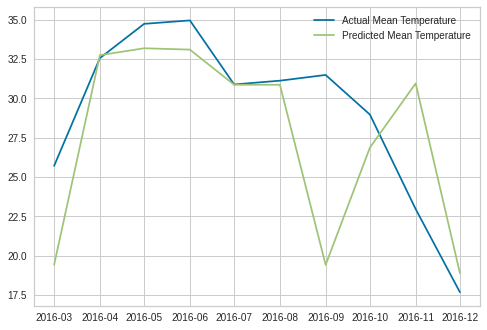

In [ ]:
plt.plot(predictions.meantemp, label="Actual Mean Temperature")
plt.plot(predictions.Label, label="Predicted Mean Temperature")
plt.legend()
plt.show()